In [1]:
#Source: https://medium.com/dataseries/lets-build-your-first-naive-bayes-classifier-with-python-d31a5140e4bc
from sklearn import datasets  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB   
#downloading the iris dataset, splitting it into train set and validation set 
iris = datasets.load_iris()  
class_names = iris.target_names  
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_df['target']=iris.target

iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [446]:
X 

array([[-637.4299   , -633.04877  , -634.63385  , ...,   -1.6896868,
          -2.7179952,    3.0275202],
       [-618.9225   , -547.1881   , -446.29718  , ...,   -6.4647107,
          -6.1894026,   -7.10847  ],
       [-618.9225   , -547.1881   , -446.29718  , ...,   -6.4647107,
          -6.1894026,   -7.10847  ],
       [-618.9225   , -547.1881   , -446.29718  , ...,   -6.4647107,
          -6.1894026,   -7.10847  ],
       [-618.9225   , -547.1881   , -446.29718  , ...,   -6.4647107,
          -6.1894026,   -7.10847  ],
       [-618.9225   , -547.1881   , -446.29718  , ...,   -6.4647107,
          -6.1894026,   -7.10847  ]], dtype=float32)

In [456]:
-2.67754310e+1

-26.775431

GaussianNB(priors=None, var_smoothing=1e-09)

[3]
[[-2.67754310e+10 -1.19229664e+10  0.00000000e+00]]



In [432]:
a = np.array([-637.4299 , -633.04877, -634.63385, -569.56757, -487.81653,
       -501.0338 , -567.84296, -601.5066 , -626.4802 , -625.2523 ])


# a = x_train[0][0]
test = pd.DataFrame({"a": [[-637.4299 , -633.04877],[-637.4299 , -633.04877]],"b":[0,1]})
NB = GaussianNB()  
NB.fit(test, np.arange(2))   

ValueError: setting an array element with a sequence.

In [431]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], iris_df['target'], random_state=0)
NB = GaussianNB()  
NB.fit(test, np.arange(2))   
y_predict = NB.predict(X_test)  
print("Accuracy 'NB: {:.2f}".format(NB.score(X_test, y_test)))
sns.set()
sns.pairplot(iris_df[['target','sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
             hue='target', diag_kind="kde")




ValueError: setting an array element with a sequence.

In [3]:
import librosa
import soundfile as sf

# Get example audio file
filename = librosa.util.example_audio_file()

data, samplerate = sf.read(filename, dtype='float32')
data = data.T
data_22k = librosa.resample(data, samplerate, 22050)

y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
mfcc_features = librosa.feature.mfcc(y=y, sr=sr)

In [4]:
#Source: https://musicinformationretrieval.com/ipython_audio.html

In [461]:

import librosa

path_wav_gustav = 'sound/gustav/gustav1.wav'
path_wav_svenja = 'sound/svenja/svenja1.wav'
path_wav_hello = 'sound/hello/hello1.wav'
path_wav_gust_sven = 'sound/gust_sven.wav'
x_gustav, sr = librosa.load(path_wav_gustav)
x_svenja, sr = librosa.load(path_wav_svenja)
x_hello, sr = librosa.load(path_wav_hello)
x_gust_sven, sr = librosa.load(path_wav_gust_sven)

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'gustav')

Text(0.5, 1.0, 'svenja')

Text(0.5, 1.0, 'hello')

Text(0.5, 1.0, 'sound')

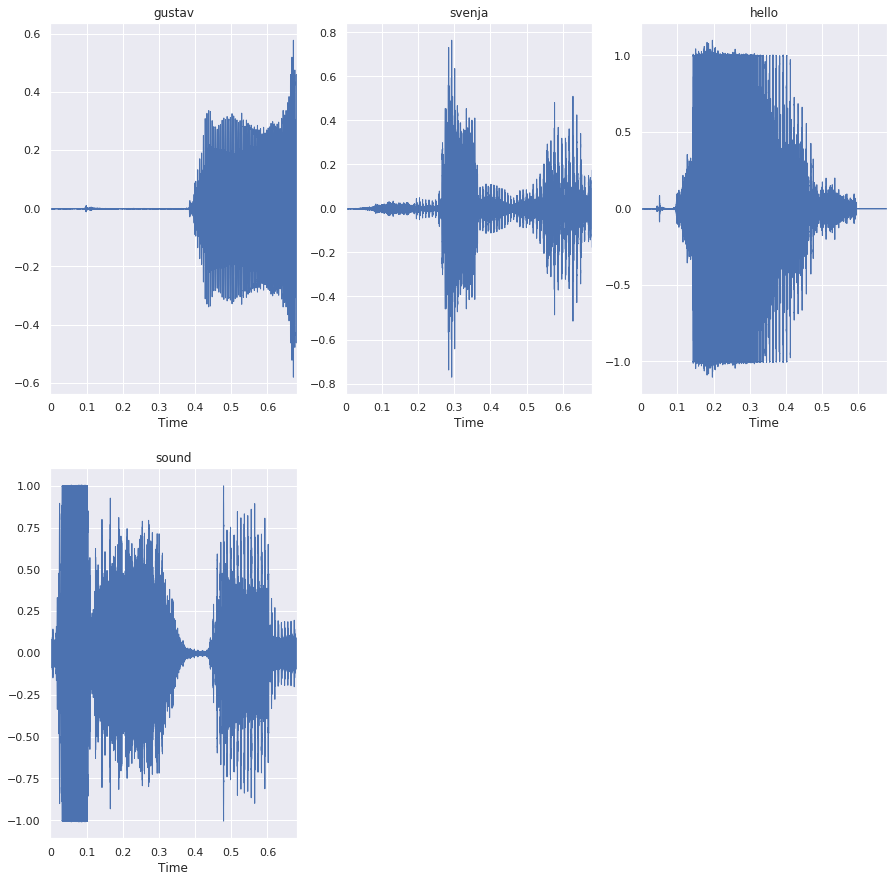

In [465]:

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'



plt.figure(figsize=(15, 15))
mfcc_features={}
for i,el in enumerate ([path_wav_gustav,path_wav_svenja,path_wav_hello,path_wav_gust_sven]):
    plt.subplot(2, 3, i+1)
    name_plot = el.split("/")[-2]
    plt.title(name_plot)
    x, sr = librosa.load(el)
    x = librosa.util.fix_length(x, 15000)
    librosa.display.waveplot(x, sr=sr) 
    mfcc_features[name_plot] = librosa.feature.mfcc(y=x, sr=sr)

plt.show()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
for el in [path_wav_gustav,path_wav_svenja,path_wav_hello,path_wav_gust_sven]:
    x, sr = librosa.load(el)
    x = librosa.util.fix_length(x, 15000)
    ipd.Audio(x,rate=sr)
    
    
    
    

Source: https://python.hotexamples.com/de/examples/sklearn.naive_bayes/GaussianNB/-/python-gaussiannb-class-examples.html

In [ ]:

df = pd.DataFrame()
for key,value in mfcc_features.items():
    print(i)
    data_dict={}
    for i,row in enumerate(value):
        data_dict[i]=[row]
    data_dict["label"]=key   
    df_loop = pd.DataFrame(data_dict)
    df = pd.concat([df,df_loop])

    
x_train = df.drop(columns=["label"])
y_train=df["label"].reset_index()
x_train = x_train.reset_index()

In [467]:
mfcc_features.keys()

dict_keys(['gustav', 'svenja', 'hello', 'sound'])

In [471]:
import numpy as np
X = np.array([mfcc_features["gustav"].flatten(),
              mfcc_features["svenja"].flatten(),
              mfcc_features["svenja"].flatten(),
              mfcc_features["hello"].flatten(),
              mfcc_features["svenja"].flatten(),
              mfcc_features["svenja"].flatten(),
             mfcc_features["sound"].flatten()]
            )
Y = np.array([1,2,2,3,2,2,4])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([mfcc_features["sound"].flatten()]))
print(clf.predict_log_proba([mfcc_features["sound"].flatten()]))


GaussianNB(priors=None, var_smoothing=1e-09)

[4]
[[-5.88732010e+10 -2.46213501e+10 -1.75553413e+10  0.00000000e+00]]


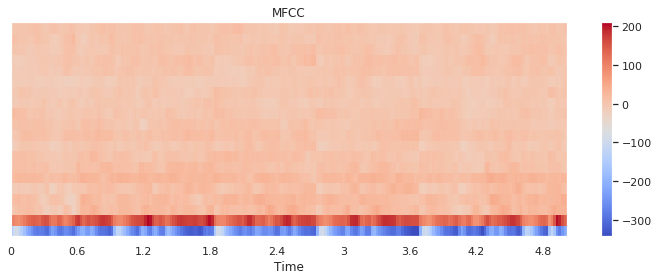

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()